In [2]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)
mpl.rcParams.update({'font.size': 22})

In [4]:
using_df = pd.read_csv("../input/서울특별시 공공자전거 대여이력 정보_2017년_1.csv", engine='python')
using_df = using_df.rename(columns={ 
    "대여소번호" : "대여대여소번호",
    "대여대여소명" : "대여대여소",
    "거치대번호" : "대여거치대",
    "반납대여소명" : "반납대여소",
    "반납 거치대번호" : "반납거치대"
})

    
for i in using_df.columns:
    using_df = using_df.rename(columns={i:"'" + i + "'"})
for i in range(1,7):
    temp = pd.read_csv(f"../input/서울특별시 공공자전거 대여이력 정보_2017년_{i+1}.csv", engine='python')
    print(temp.head())
    using_df = pd.concat([using_df,temp])

    
using_df = using_df.reset_index()
del using_df['index']
for i in using_df.columns:
    using_df = using_df.rename(columns={i:i.replace("'","")})


       '자전거번호'                 '대여일시' '대여대여소번호'          '대여대여소'  '대여거치대'  \
0  'SPB-00516'  '2017-04-01 00:00:37'     '259'       ' 대방역6번출구'        8   
1  'SPB-02969'  '2017-04-01 00:00:42'     '516'       ' 광진메디칼 앞'        5   
2  'SPB-01628'  '2017-04-01 00:00:43'     '316'    ' 종각역 1번출구 앞'       11   
3  'SPB-00178'  '2017-04-01 00:01:59'     '233'       ' YP 센터 앞'        7   
4  'SPB-04518'  '2017-04-01 00:02:28'     '334'  ' 종로3가역 2번출구 뒤'        7   

                  '반납일시' '반납대여소번호'             '반납대여소'  '반납거치대'  '이용시간(분)'  \
0  '2017-04-01 00:27:20'     '202'           ' 국민일보 앞'        4         26   
1  '2017-04-01 00:08:35'     '540'  ' 군자역 7번출구 베스트샵 앞'        8          7   
2  '2017-04-01 00:09:58'     '349'          ' 사직동주민센터'        1          9   
3  '2017-04-01 00:10:34'     '232'     ' 양평우림 이비즈센타 앞'        9          8   
4  '2017-04-01 00:14:55'     '340'          ' 혜화동 로터리'        1         12   

   '이용거리(M)'  
0       7870  
1       1460  
2       1660  
3       

In [5]:
using_df.tail()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M)
4975949,'SPB-09854','2017-12-31 23:58:55','549',' 아차산역 3번출구',9,'2018-01-01 00:09:39','592',' 건국대학교 학생회관',12,10,2280
4975950,'SPB-01013','2017-12-31 23:58:56','1404',' 동일로 지하차도',2,'2018-01-01 00:33:01','1414',' 사가정역 1번출구',7,33,4070
4975951,'SPB-03956','2017-12-31 23:59:00','341',' 혜화역 3번출구 뒤',2,'2018-01-01 00:49:23','358',' 성대입구 사거리',8,49,7240
4975952,'SPB-00296','2017-12-31 23:59:46','1211',' 방이삼거리',1,'2018-01-01 00:07:18','1211',' 방이삼거리',1,7,0
4975953,'SPB-11004','2017-12-31 23:59:49','1445',' 용마지구대',1,'2018-01-01 00:17:35','602',' 장안동 사거리',10,16,2310


In [6]:
using_df['대여대여소'] = using_df['대여대여소'].apply(lambda x: x.replace("'","").strip())
using_df['대여대여소번호'] = using_df['대여대여소번호'].apply(lambda x : str(x).replace("'",""))
using_df['반납대여소'] = using_df['반납대여소'].apply(lambda x: str(x).replace("'","").strip())
using_df['반납대여소번호'] = using_df['반납대여소번호'].apply(lambda x : str(x).replace("'","").strip())
using_df['자전거번호'] = using_df['자전거번호'].apply(lambda x: x.replace("'","").strip())
using_df['대여일시'] = using_df['대여일시'].apply(lambda x: x.replace("'",""))
using_df['반납일시'] = using_df['반납일시'].apply(lambda x: x.replace("'",""))
using_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M)
0,SPB-00230,2017-01-01 0:00,419,홈플러스 앞,5,2017-01-01 0:21,914,새절역 2번출구,18,20,3340
1,SPB-02803,2017-01-01 0:01,825,서빙고동 주민센터 앞,2,2017-01-01 0:15,822,이촌1동 마을공원,7,14,3380
2,SPB-03956,2017-01-01 0:05,906,연신내역 5번출구150M 아래,1,2017-01-01 0:16,931,역촌파출소,6,11,1610
3,SPB-02864,2017-01-01 0:05,906,연신내역 5번출구150M 아래,9,2017-01-01 0:29,912,응암오거리,1,24,3620
4,SPB-01388,2017-01-01 0:05,330,청계천 한빛광장,6,2017-01-01 0:23,171,임광빌딩 앞,9,17,2280


In [7]:
using_df['대여일시'] = pd.to_datetime(using_df["대여일시"])
using_df['반납일시'] = pd.to_datetime(using_df["반납일시"])
using_df['요일'] = using_df["대여일시"].dt.weekday_name
using_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),요일
0,SPB-00230,2017-01-01 00:00:00,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,Sunday
1,SPB-02803,2017-01-01 00:01:00,825,서빙고동 주민센터 앞,2,2017-01-01 00:15:00,822,이촌1동 마을공원,7,14,3380,Sunday
2,SPB-03956,2017-01-01 00:05:00,906,연신내역 5번출구150M 아래,1,2017-01-01 00:16:00,931,역촌파출소,6,11,1610,Sunday
3,SPB-02864,2017-01-01 00:05:00,906,연신내역 5번출구150M 아래,9,2017-01-01 00:29:00,912,응암오거리,1,24,3620,Sunday
4,SPB-01388,2017-01-01 00:05:00,330,청계천 한빛광장,6,2017-01-01 00:23:00,171,임광빌딩 앞,9,17,2280,Sunday


In [8]:
using_df['이용거리(M)'].describe().apply(int).reset_index()

,index,이용거리(M)
0,count,4975954
1,mean,3657
2,std,4752
3,min,0
4,25%,1140
5,50%,2220
6,75%,4590
7,max,255990


In [9]:
using_df[(using_df['이용거리(M)'] != 0) |
         (using_df['이용시간(분)'] > 5)
        ].shape

(4949358, 12)

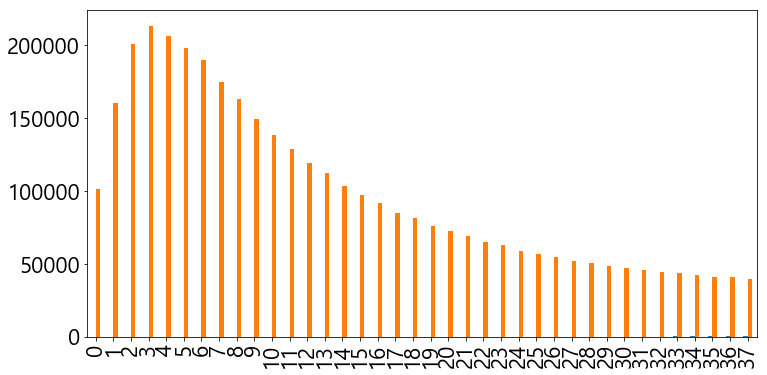

In [17]:
a = using_df.groupby("이용시간(분)")["대여일시"].count().reset_index()
a[a["이용시간(분)"] < 40].plot(kind='bar', figsize=(12,6), legend=False)

In [10]:
print(using_df.shape)
print(using_df[using_df['이용거리(M)'] == 0].shape)
print(using_df[using_df['이용거리(M)'] > 50000].shape)
working_df = using_df[(using_df['이용거리(M)'] != 0 ) | (using_df['이용시간(분)'] > 5)].copy()

(4975954, 12)
(139970, 12)
(2581, 12)


In [13]:
working_df.shape

(4949358, 12)

In [14]:
a = working_df.shape
b = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] <= 10) & (working_df['이용시간(분)'] > 0)].shape
b[0] / a[0] * 100

31.424479700195462

In [15]:
a = working_df.shape
b = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] <= 15) & (working_df['이용시간(분)'] > 0)].shape
b[0] / a[0] * 100

44.16205091650271

In [16]:
a = working_df.shape
b = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] >= 60) & (working_df['이용시간(분)'] > 0)].shape
b[0] / a[0] * 100

10.899534848762203

In [17]:
working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] <= 15) & (working_df['이용시간(분)'] > 0)]['이용거리(M)'].mean()

1413.7632003469766

In [18]:
working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] <= 10) & (working_df['이용시간(분)'] > 0)]['이용거리(M)'].mean()

1148.5434993666856

In [19]:
time_df = working_df.copy()
time_df.head()

,자전거번호,대여일시,대여대여소번호,대여대여소,대여거치대,반납일시,반납대여소번호,반납대여소,반납거치대,이용시간(분),이용거리(M),요일
0,SPB-00230,2017-01-01 00:00:00,419,홈플러스 앞,5,2017-01-01 00:21:00,914,새절역 2번출구,18,20,3340,Sunday
1,SPB-02803,2017-01-01 00:01:00,825,서빙고동 주민센터 앞,2,2017-01-01 00:15:00,822,이촌1동 마을공원,7,14,3380,Sunday
2,SPB-03956,2017-01-01 00:05:00,906,연신내역 5번출구150M 아래,1,2017-01-01 00:16:00,931,역촌파출소,6,11,1610,Sunday
3,SPB-02864,2017-01-01 00:05:00,906,연신내역 5번출구150M 아래,9,2017-01-01 00:29:00,912,응암오거리,1,24,3620,Sunday
4,SPB-01388,2017-01-01 00:05:00,330,청계천 한빛광장,6,2017-01-01 00:23:00,171,임광빌딩 앞,9,17,2280,Sunday


In [20]:
time_df = time_df.set_index('대여일시')

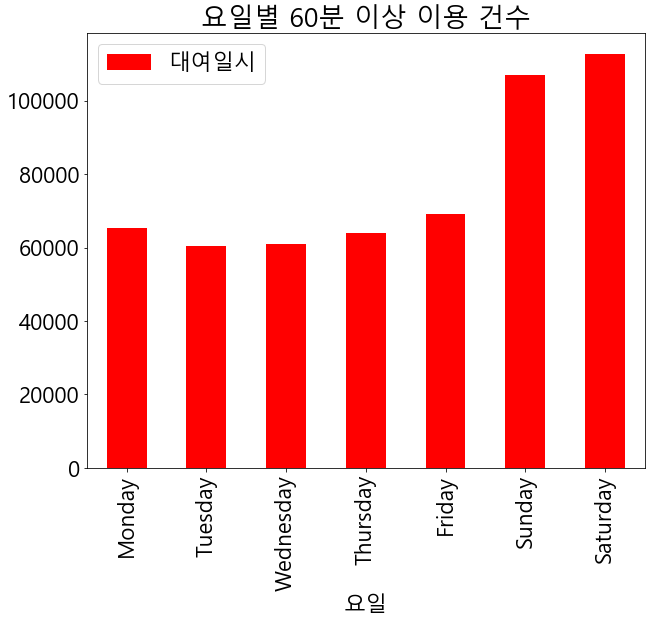

In [21]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}

a = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] >= 60) & (working_df['이용시간(분)'] > 0)].groupby("요일")["대여일시"].count()
a = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] >=60) & (working_df['이용시간(분)'] > 0)].groupby("요일")['대여일시'].count()

cloud  = pd.DataFrame(a)
key = cloud.index.map(mapping)
cloud = cloud.iloc[key.argsort()]
cloud.plot(kind='bar', figsize=(10,8), color='RED', title="요일별 60분 이상 이용 건수")

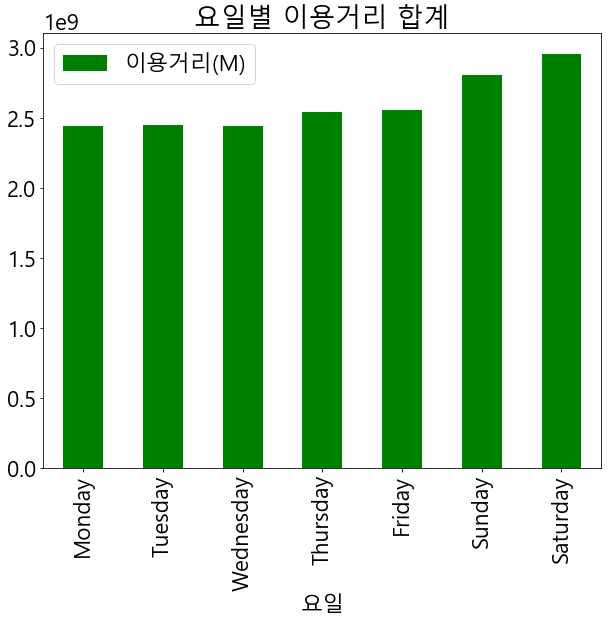

In [22]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Satday', 'Sunday']
mapping = {day: i for i, day in enumerate(weekdays)}

a = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] >= 60) & (working_df['이용시간(분)'] > 0)].groupby("요일")["대여일시"].count()
a = working_df[(working_df['이용거리(M)'] != 0 ) & (working_df['이용시간(분)'] > 0)].groupby("요일")['이용거리(M)'].sum()

cloud  = pd.DataFrame(a)
key = cloud.index.map(mapping)
cloud = cloud.iloc[key.argsort()]
cloud.plot(kind='bar', figsize=(10,8), color='Green', title="요일별 이용거리 합계")

In [23]:
hist(cumulative=True, density=1, bins=100)

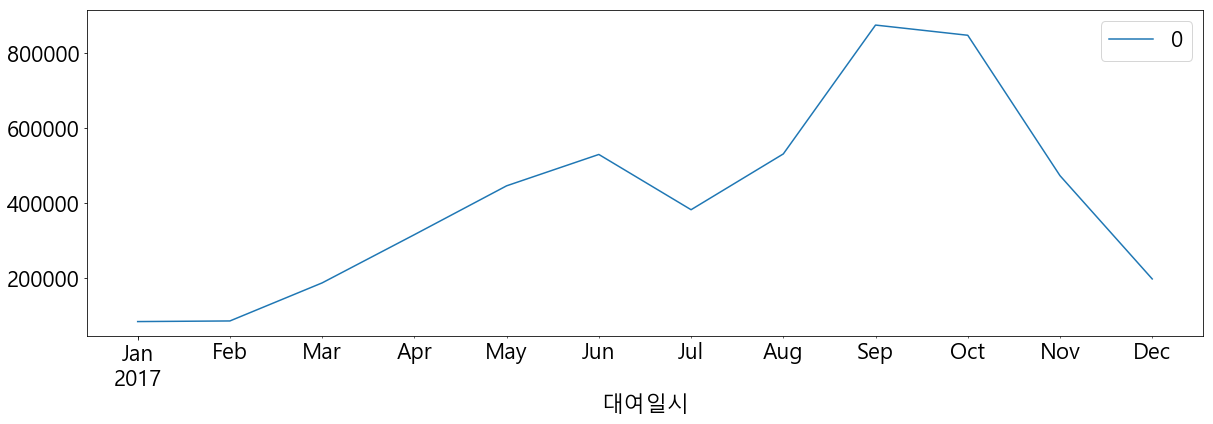

In [24]:
pd.DataFrame(time_df.resample('M').size()).plot(kind='line', figsize=(20,6))

In [25]:
a = working_df[(working_df['이용거리(M)'] != 0)]

def yeokfinder(daeyer, banap):
    if '역' in daeyer:
        return True
    elif '역' in banap:
        return True
    else:
        return False
    
a['yeok'] = list(map(yeokfinder, a['대여대여소'], a['반납대여소']))

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [26]:
ashape = a.shape

In [27]:
bshape = a[a['yeok'] == True].shape

In [28]:
print( bshape[0] / ashape[0])

0.5785298297099412


In [ ]:
working_df.head()

In [120]:
eiyoung = working_df.groupby("대여대여소번호")["대여일시"].count().reset_index()
#이용횟수
eiyoung

,대여대여소번호,대여일시
0,1001,6581
1,1002,2762
2,1003,2644
3,1004,2984
4,1006,3109
5,1007,623
6,1008,4336
7,1009,1251
8,101,4680
9,1010,4522


In [151]:
working_df['날짜'] = working_df['대여일시'].dt.date
nalza = working_df.groupby(["대여대여소번호","날짜"])["대여일시"].count().reset_index()
daysofusing = nalza.groupby("대여대여소번호")["날짜"].count().reset_index()
daysofusing = daysofusing.rename(columns={"날짜": "이용일수"})

In [152]:
usagedf = eiyoung.merge(daysofusing, on="대여대여소번호", how='left')
usagedf.head()

,대여대여소번호,대여일시,이용일수
0,1001,6581,228
1,1002,2762,234
2,1003,2644,248
3,1004,2984,245
4,1006,3109,244


In [153]:
usagedf["이용률"] = list(map(lambda x,y : x/y, usagedf["대여일시"], usagedf["이용일수"]))
usagedf.sort_values(by="이용률", ascending=True)

,대여대여소번호,대여일시,이용일수,이용률
977,722,1,1,1.000000
1036,953,1,1,1.000000
1035,949,1,1,1.000000
132,1234,1,1,1.000000
1034,945,1,1,1.000000
1033,938,1,1,1.000000
339,1652,3,3,1.000000
1032,937,1,1,1.000000
674,2363,1,1,1.000000
25,1025,15,14,1.071429


In [162]:
gerchi = pd.read_excel("../input/공공자전거대여소정보_20180409.xlsx")
gerchi["대여소번호"] = gerchi["대여소번호"].apply(str)
gerchi = gerchi[["대여소번호", "대여소명"]]

In [163]:
daeyoer = working_df.groupby(['대여대여소', '대여대여소번호'])['대여일시'].count().reset_index().sort_values(by='대여일시', ascending=False)

In [165]:
usagedf = usagedf.merge(gerchi, left_on="대여대여소번호", right_on="대여소번호", how='left')
usagedf.sort_values(by="이용률", ascending=True)

,대여대여소번호,대여일시,이용일수,이용률,대여소번호_x,거치대,대여소번호_y,대여소명_x,대여소번호,대여소명_y
977,722,1,1,1.000000,722,10.0,722,LG전자베스트샵 신정점,722,LG전자베스트샵 신정점
1036,953,1,1,1.000000,953,10.0,953,서울연신초등학교,953,서울연신초등학교
1035,949,1,1,1.000000,949,7.0,949,연신내역 1번 출구,949,연신내역 1번 출구
132,1234,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1034,945,1,1,1.000000,945,10.0,945,기자촌 사거리,945,기자촌 사거리
1033,938,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
339,1652,3,3,1.000000,1652,10.0,1652,파르코 앞,1652,파르코 앞
1032,937,1,1,1.000000,937,15.0,937,상림마을 롯데캐슬2단지 옆,937,상림마을 롯데캐슬2단지 옆
674,2363,1,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25,1025,15,14,1.071429,1025,10.0,1025,상일초등학교,1025,상일초등학교


In [166]:
usagedf.sort_values(by="이용률", ascending=False)

,대여대여소번호,대여일시,이용일수,이용률,대여소번호_x,거치대,대여소번호_y,대여소명_x,대여소번호,대여소명_y
495,207,53813,364,147.837912,207,40.0,207,여의나루역 1번출구 앞,207,여의나루역 1번출구 앞
80,113,41752,364,114.703297,113,25.0,113,홍대입구역 2번출구 앞,113,홍대입구역 2번출구 앞
840,502,38361,364,105.387363,502,15.0,502,뚝섬유원지역 1번출구 앞,502,뚝섬유원지역 1번출구 앞
110,1210,14816,158,93.772152,1210,30.0,1210,롯데월드타워(잠실역2번출구 쪽),1210,롯데월드타워(잠실역2번출구 쪽)
498,2102,16285,205,79.439024,2102,20.0,2102,봉림교 교통섬,2102,봉림교 교통섬
556,2219,14278,199,71.748744,2219,20.0,2219,"고속터미널역 8-1번, 8-2번 출구 사이",2219,"고속터미널역 8-1번, 8-2번 출구 사이"
416,1906,15189,214,70.976636,1906,20.0,1906,신도림역 1번 출구 앞,1906,신도림역 1번 출구 앞
282,152,25166,364,69.137363,152,30.0,152,마포구민체육센터 앞,152,마포구민체육센터 앞
174,1308,11844,193,61.367876,1308,10.0,1308,안암로터리 버스정류장 앞,1308,안암로터리 버스정류장 앞
47,106,22180,364,60.934066,106,10.0,106,합정역 7번출구 앞,106,합정역 7번출구 앞


In [ ]:
daeyoer.head()

In [97]:
daeyoer.merge("gerchi")

,대여대여소,대여대여소번호,대여일시
723,여의나루역 1번출구 앞,207,53813
1018,홍대입구역 2번출구 앞,113,41752
311,뚝섬유원지역 1번출구 앞,502,38361
338,마포구민체육센터 앞,152,25166
1000,합정역 7번출구 앞,106,22180


In [ ]:
timea = a.set_index('대여일시') 
timea

In [85]:
grouper = timea.groupby('yeok').resample('M')['대여거치대'].count().unstack().T

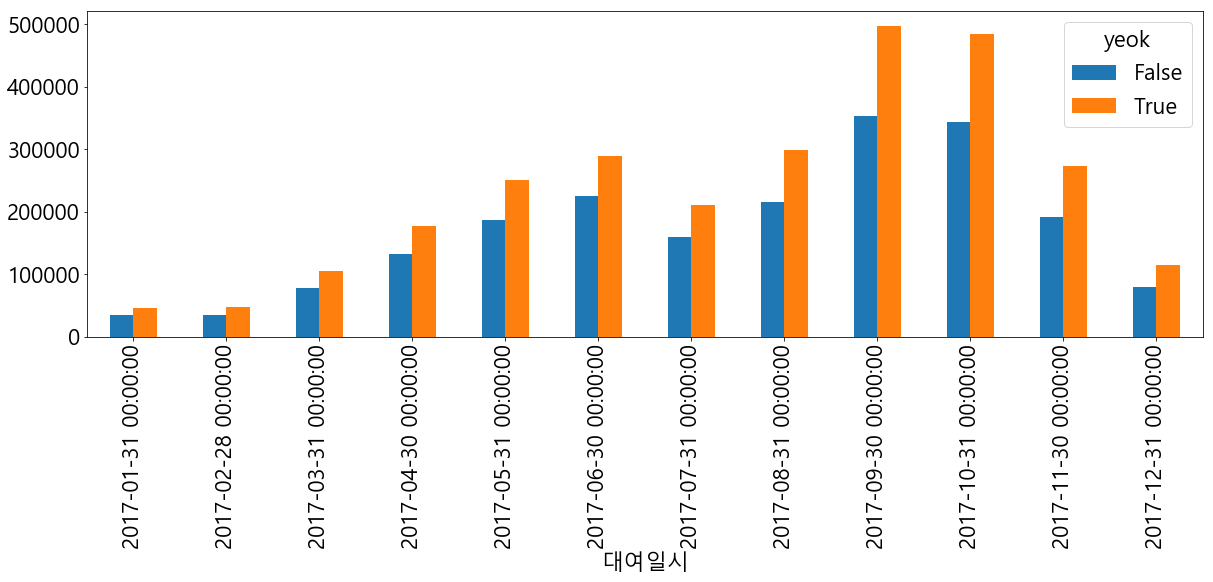

In [90]:
grouper.plot(kind='Bar', figsize=(20,6))